In [1]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# STEP 2: Load dataset
file_path = "../Data/Raw/Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")
df.shape

(9994, 21)

In [3]:
# STEP 3: Preview data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# STEP 4: Drop unnecessary columns
df.drop(columns=[
    'Row ID', 'Customer Name', 'Country', 'City', 'State',
    'Postal Code', 'Product ID', 'Product Name'
], inplace=True)

df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# STEP 5: Convert Order and Ship dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [6]:
# STEP 6: Create a new feature - Shipping Duration
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

In [7]:
# STEP 7: Save processed data to /Data/Processed/
processed_path = "../Data/Processed/superstore_processed.csv"
df.to_csv(processed_path, index=False)

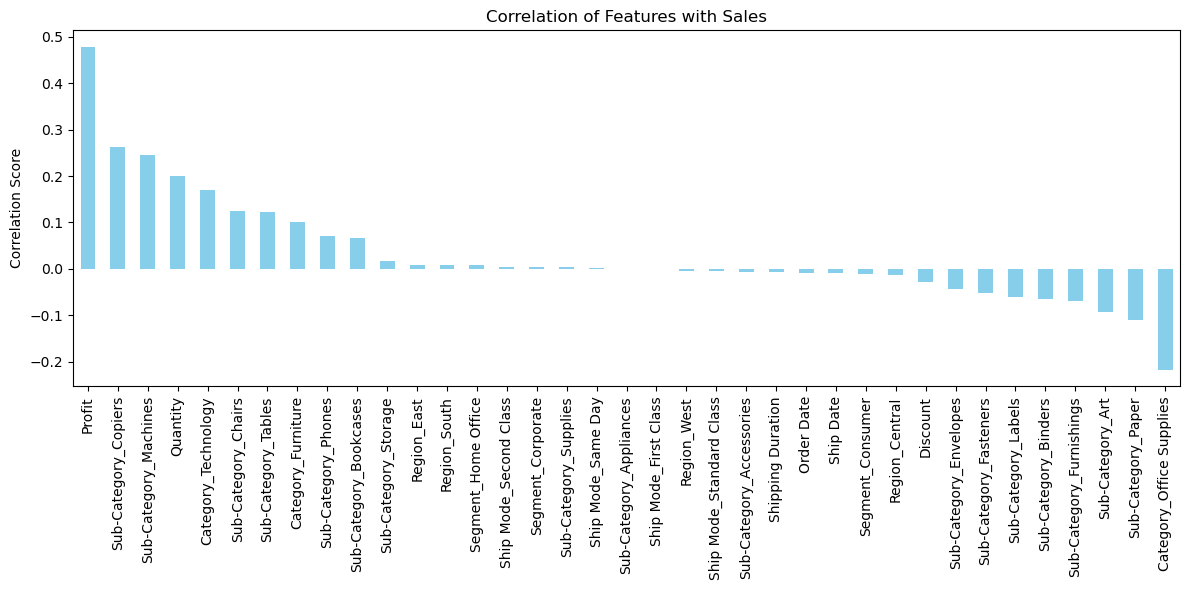

In [9]:
# STEP 8 Basic EDA - Feature correlation

# Drop non-numeric ID columns
df_encoded_corr = df_encoded.drop(columns=['Order ID', 'Customer ID'])

# Create bar plot of correlation with 'Sales'
plt.figure(figsize=(12, 6))
correlation = df_encoded_corr.corr()['Sales'].sort_values(ascending=False)
correlation.drop(['Sales'], inplace=True)
correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Sales")
plt.ylabel("Correlation Score")
plt.tight_layout()
plt.show()


In [10]:
# STEP 9: Save correlation plot
eda_plot_path = "../Reports/feature_correlation_with_sales.png"
plt.figure(figsize=(12, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Sales")
plt.ylabel("Correlation Score")
plt.tight_layout()
plt.savefig(eda_plot_path)
plt.close()

In [12]:
# STEP 10: Done
print("Data preprocessed and saved.")
print("Correlation plot saved to /Reports/")

Data preprocessed and saved.
Correlation plot saved to /Reports/
